<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Shanghai*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Shanghai, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Os dados estudados foram retirado do portal [inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para nossa análise exploratória de dados iremos baixar o seguinte arquivo:
- listings.csv - 	Summary information and metrics for listings in Shanghai (good for visualisations).



In [16]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import numpy as np
from scipy import stats

%matplotlib inline 


In [17]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/china/shanghai/shanghai/2020-12-23/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [18]:
# mostrar as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,24963,Heart of French Concession / Home,98203,Jia,NaN,徐汇区 / Xuhui District,31.20918,121.45150,Entire home/apt,458,3,85,2020-08-15,0.68,2,238
1,24991,French Concession Yongkang area,98203,Jia,NaN,徐汇区 / Xuhui District,31.21095,121.45105,Entire home/apt,523,3,1,2013-08-10,0.01,2,127
2,139828,【sidihome】The minimalist business apt In jing’an,681552,Leon,NaN,普陀区 / Putuo District,31.24399,121.44296,Entire home/apt,355,3,26,2019-08-17,0.25,18,1
3,139846,【sidihome】Lavender·Purple flowers warm apt,681552,Leon,NaN,静安区 / Jing'an District,31.24400,121.44433,Entire home/apt,559,1,57,2016-12-29,0.50,18,286
4,161932,Sublet 1BR in Shanghai July 1-Aug 1,774393,Michael,NaN,静安区 / Jing'an District,31.23101,121.42961,Entire home/apt,327,30,0,NaN,NaN,1,68


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [19]:
# identificar o volume de dados do DataFrame
print("Entradas " , df.shape[0])
print("Variáveis", df.shape[1])

# verificar os tipos das nossas variáveis
df.dtypes

Entradas  36165
Variáveis 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Quando analisamos um conjunto de dados precisamos observar a quantidade de valores ausentes em nossas variáveis, e analisar se esses valores faltantes iram prejudicar o estudo que estamos realizando.
Podemos perceber que existe três variavéis em nosso conjunto de dados que apresentam uma quantidade significativa de valores ausente:

- `Na coluna neighbourhood_group apresentam 100% dos dados nulos`
- `Na colunas reviews_per_month  e last_review apresenta 46% aproximadamente dos dados nulos`

Podemos analisar duas colunas que apresentam valores nulos porém em quantidades muito inferiores as apresentadas acima.

- `Na coluna host_name e name apresentam poucos valores nulos, aproximadamente 0,1% do`

In [20]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum().sort_values(ascending = False)/df.shape[0])*100)

neighbourhood_group               100.000000
reviews_per_month                  46.274022
last_review                        46.274022
host_name                           0.044242
name                                0.005530
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Quando trabalhamos com grandes conjuntos de dados é interessante analisar como esses dados estão sendo distribuidos, em particular, em saber se esses dados tem uma distribuição normal.
A distribuição normal é caracterizada por uma função de probabilidade, em que o gráfico descreve uma curva simetrica em relação a média, possuindo uma forma de sino, conforme a figura abaixo.
![Normal](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img001.png)

Para analisarmos as distribuições das variáveis do nosso conjunto de dados de uma forma visual iremos utilizar histogramas. 

Os histogramas são gráficos de barras de mesma largura e desenhadas adjacentes umas às outras. O eixo horizontal representa classe de valores de dados quantitativos, e o eixo vertical irá representar a frequência dessas classes.



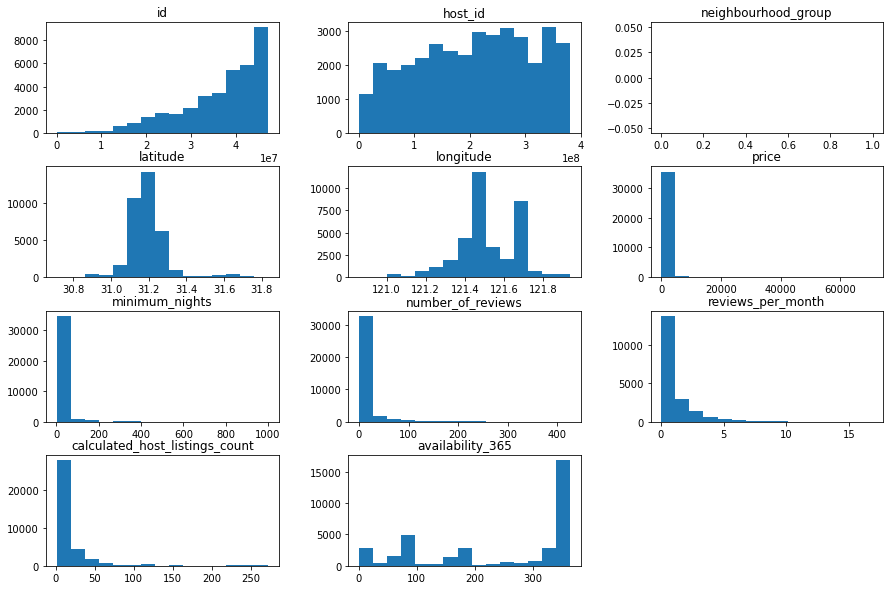

In [21]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 15, figsize = (15,10), grid = False);

Analisando em primeiro instante não conseguimos analisar nenhuma das variáveis dos nossos dados tendo caracteristicas de curvas normais.

### **Q4. Qual a média dos preços de aluguel?**
Nessa sessão iremos aprofundar um pouco mais nos preços dos aluguéis, lembrando que por padrão os dados do Airbnb trazem valores em moeda local.
Para essa analise usaremos o método `describe()` que resumem alguns dados das nossas variáveis, nos informando valores como média, quartis, valor máximo, valor mínimo e desvio padrão da nossa variável. 

E usaremos também o `histograma` e o um gráfico que chama `boxplot` onde conseguiremos analisar melhor essa questão de distribuição de frequência dos nossos dados e nossos outliers.

Podemos Analisar através do nosso histograma que a maior distribuição dos preços estão entre os valores 0 a 5000 Renminbi(moeda local), mas que também apresentam valores que estão muito acima desse patamar.

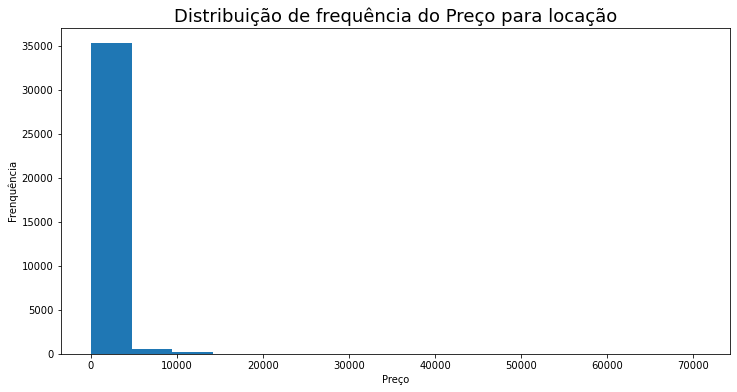

In [22]:
ax = df["price"].hist(bins = 15, figsize=(12,6), grid = False);
ax.set_title("Distribuição de frequência do Preço para locação", fontsize = 18)
ax.set_xlabel("Preço")
ax.set_ylabel("Frenquência");


In [23]:
df["price"].describe()

count    36165.000000
mean       756.029144
std       2265.833343
min          0.000000
25%        232.000000
50%        354.000000
75%        560.000000
max      70780.000000
Name: price, dtype: float64

In [24]:
 statistics.multimode(df["price"]) 

[288]

Uma comparação entre moda, mediana e média pode nos revelar informações sobre a característica de assimetria dos nossos dados. 

-Analisando o resumo estátisco acima podemos ver que 50% dos nossos dados são menores que 354 Renminbi e 75% dos nossos dados são menores que 560 Renminbi seu valor máximo é igual a 70780 Renminbi.

-Nossa média de preços está indicando 760 Renminbi aproximadamente.

-Nossa moda está indicando valor de 288 Renminbi.

Sabemos que a média é uma medida de tendência central que leva em consideração todos os valores de uma amostra o que é algo positivo. No entanto, como a média é sensivel a cada valor, valores extremos pode afeta-la de maneira consideravel. A média acaba não resistindo a valores extremos, portanto podemos dizer que a média não é uma medida de centro resistente.
Quando nossa moda é menor que nossa média indica uma assimetria para direita, ou seja, poucos valores de magnitude alta estão aumentando o valor da nossa média, podendo esses serem valores que são considerados outliers.

Outliers são valores que diferenciam muito da maioria dos nossos conjuntos de dados, podemos perceber que 75% dos nossos dados são menores que 560 Renminbi e mesmo assim a média está dando acima desse valor. 
A seguir usaremos o gráfico boxplot para vermos visualmente esses outliers.
<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>

O box plot é um gráfico que podemos retirar varias informações, como medidas de dispersão, assimetria, valores discrepantes(outliers).
<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img005.png' width='65%'>
Quando plotamos logo abaixo o gráfico box plot da nossa variavel preço podemos perceber uma grande concentração de circulos a direita, esses circulos representam valores que são discrepantes , esses valores acabam atrapalhando os nossos estudos sobre a varialvel preço pois acabam  enviesando nossa pesquisa.
 

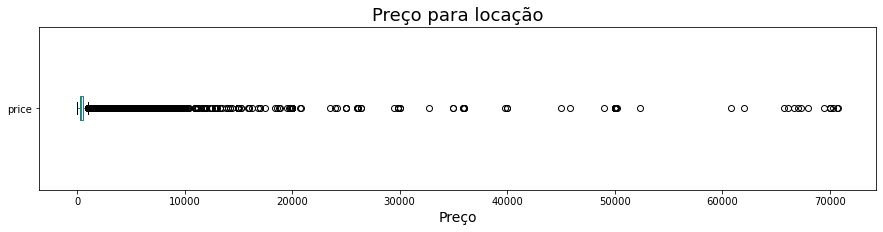

In [25]:
ax = df["price"].plot(kind = "box", vert = False, figsize = (15,3))
ax.set_xlabel("Preço", fontsize = 14)
ax.set_title("Preço para locação", fontsize = 18);


Nessa imagem logo abaixo podemos analisar que os gráficos de dispersão de frequência e o gráfico box plot apresentam informações semelhantes mas com modos de visualização diferente. Mostrando que o gráfico box plot é uma excelênte ferramenta.
<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img006.png' width='80%'>

### Q5. Eliminando outliers e analisando novamente média de preços.

In [26]:
q3, q1 = np.percentile(df["price"], [75, 25])
interquartil = q3 - q1
limite_superior =q3 + 1.5 * interquartil
limite_inferior = q1 - 1.5 * interquartil 
price = []
df_novo = df.loc[((df["price"]>limite_inferior) & (df["price"]<limite_superior))]
dados_excluidos = df["price"].shape[0] - len(df_novo)
print("Nossa nova média é {}" .format(np.mean(df_novo["price"])))
print("Foram eliminados o total de {} outliers"  .format(dados_excluidos))
media =np.mean(df_novo["price"])


Nossa nova média é 365.7916990276181
Foram eliminados o total de 3976 outliers


Podemos perceber que quando eliminamos os dados discrepantes encontramos uma média mais fiel, iremos plotar um novo `histograma`para analisarmos como ficou a distribuição dos nossos dados.

C:\Users\joaog\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


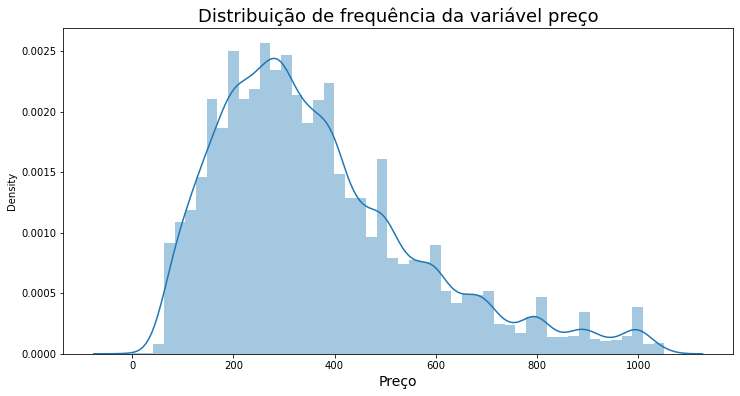

In [27]:
ax = sns.distplot(df_novo["price"])
ax.set_title("Distribuição de frequência da variável preço", fontsize = 18)
ax.set_xlabel("Preço", fontsize=14)
ax.figure.set_size_inches(12, 6);


Nosso gráfico de distribuição apresenta uma caracteristica muito mais semelhante a um gráfico de distribuição normal, caracteristica que é extremamente importante quando formos trabalhar com estatistica inferêncial.

### **Q5. Qual a correlação existente entre as variáveis**
Quando estamos analisando uma correlação entre variaveis estamos querendo entendender o quanto uma variavel influência na outra.

O que a correlação procura entender é como com uma variavel específica se comporta onde outra está variando, tentando entender se existe uma relação entre ambas.  
O coeficiênte de correlação pode possuir valores entre -1 e +1, quando o valor é -1 indica uma associação negativa e quando valor é +1, indica uma associação positiva.

In [28]:
# criar uma matriz de correlação
corr = df_novo.corr()

# mostrar a matriz de correlação
display(corr)

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.590651,NaN,-0.046887,0.047089,-0.048225,0.059482,-0.366800,0.142596,0.144218,0.094361
host_id,0.590651,1.000000,NaN,-0.094555,0.112058,-0.075643,0.108301,-0.272410,0.038966,0.082174,0.114673
neighbourhood_group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,-0.046887,-0.094555,NaN,1.000000,-0.174898,0.060147,0.022658,0.010342,-0.032465,0.009231,-0.005070
longitude,0.047089,0.112058,NaN,-0.174898,1.000000,0.027873,-0.124084,0.006245,0.066592,0.068292,-0.019730
price,-0.048225,-0.075643,NaN,0.060147,0.027873,1.000000,-0.109499,0.023657,0.004527,0.012188,-0.057953
minimum_nights,0.059482,0.108301,NaN,0.022658,-0.124084,-0.109499,1.000000,-0.062480,-0.029059,-0.066862,0.111428
number_of_reviews,-0.366800,-0.272410,NaN,0.010342,0.006245,0.023657,-0.062480,1.000000,0.643542,-0.082303,-0.153979
reviews_per_month,0.142596,0.038966,NaN,-0.032465,0.066592,0.004527,-0.029059,0.643542,1.000000,-0.037470,-0.134810
calculated_host_listings_count,0.144218,0.082174,NaN,0.009231,0.068292,0.012188,-0.066862,-0.082303,-0.037470,1.000000,0.050040


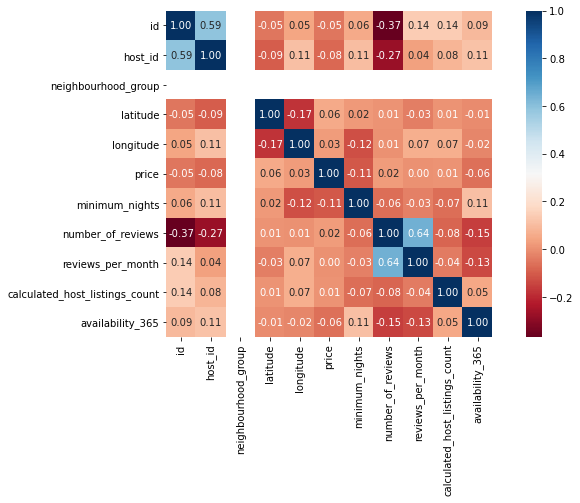

In [29]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True).figure.set_size_inches(12, 6)

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

In [30]:
# mostrar a quantidade de cada tipo de imóvel disponível
tipo_de_imovel = df_novo["room_type"].value_counts()
tipo_de_imovel.index = ["Imovel inteiro", "Quarto individual", "Quarto compartilhado", "Quarto de Hotel"]
tipo_de_imovel = pd.DataFrame(tipo_de_imovel)
tipo_de_imovel.columns = ["Quantidade"]
tipo_de_imovel

,Quantidade
Imovel inteiro,17193
Quarto individual,14029
Quarto compartilhado,965
Quarto de Hotel,2


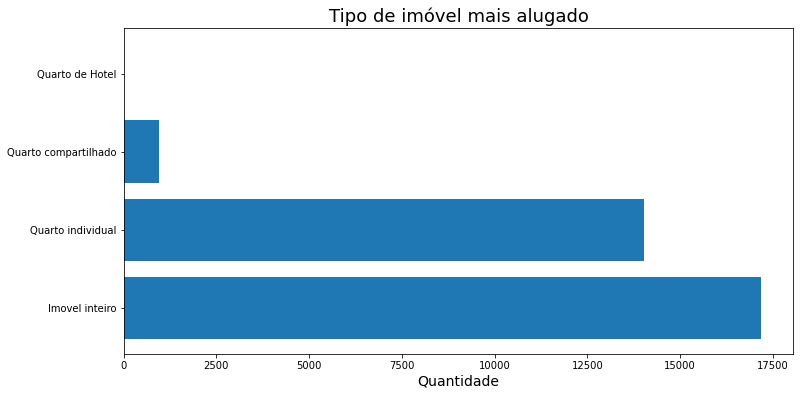

In [31]:
plt.figure(figsize=(12,6))
plt.barh(tipo_de_imovel.index, tipo_de_imovel["Quantidade"])
plt.title("Tipo de imóvel mais alugado", fontsize = 18)
plt.xlabel("Quantidade", fontsize = 14);

### **Q7. Qual a localidade mais cara do dataset?**



In [32]:
# ver preços por bairros, na média
df_novo.groupby(["neighbourhood"])[["price"]].mean().sort_values(by = ["price"], ascending = False)

,price
neighbourhood,
崇明区 / Chongming District,472.808237
黄浦区 / Huangpu District,438.507327
金山区 / Jinshan District,415.287500
青浦区 / Qingpu District,410.785304
徐汇区 / Xuhui District,402.822271
长宁区 / Changning District,372.919502
虹口区 / Hongkou District,372.683263
静安区 / Jing'an District,367.573012
浦东新区 / Pudong,362.028823


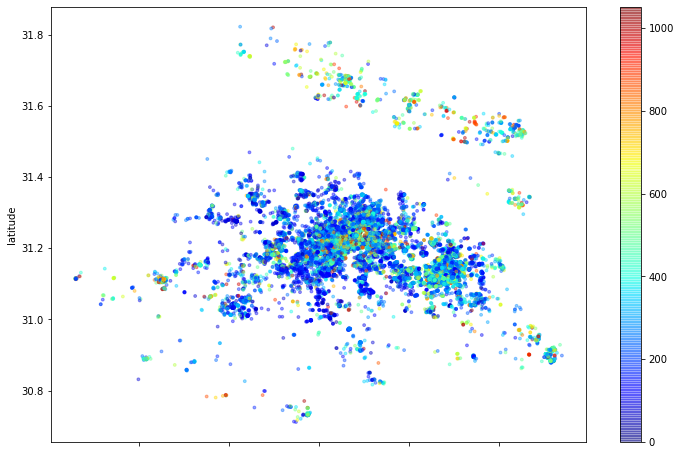

In [33]:
# plotar os imóveis pela latitude-longitude
df_novo.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_novo['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [34]:
df["minimum_nights"].mean()

10.691690861330015

Quando analisamos a média do mínimo de noites para aluguel podemos perceber que é um número alto, então teremos que fazer uma análise mais detalhada para confirmarmos essa informação.

In [35]:
df["minimum_nights"].describe()

count    36165.000000
mean        10.691691
std         40.444881
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1000.000000
Name: minimum_nights, dtype: float64

In [36]:
np.sort(df["minimum_nights"].unique())

array([   1,    2,    3,    4,    5,    6,    7,    8,   10,   11,   12,
         14,   15,   16,   17,   18,   19,   20,   21,   23,   25,   26,
         27,   28,   29,   30,   31,   32,   33,   35,   38,   40,   45,
         50,   59,   60,   61,   62,   65,   66,   68,   70,   80,   89,
         90,   91,   92,   93,  100,  120,  125,  150,  152,  160,  170,
        178,  180,  182,  183,  185,  188,  190,  200,  210,  240,  270,
        300,  360,  365,  465,  500,  555,  999, 1000], dtype=int64)

Usamos uma função para podermos analisar todos os valores que se encontra nos nossos dados referente ao mínimo de noites , e podemos perceber que existem valores extremamente alto para uma variavel desse tipo, provavelmente em nossos dados existem outliers, para conseguirmos uma média mais fiel precisamos fazer um tratamento de dados e remoção desses dados extremos.

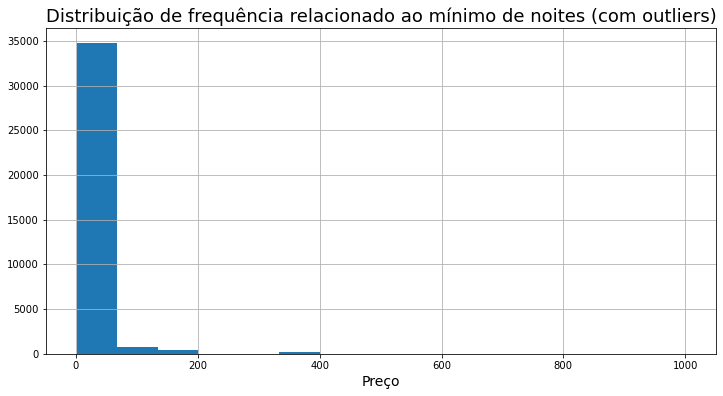

In [37]:
ax = df["minimum_nights"].hist(bins = 15, figsize=(12,6));
ax.set_title("Distribuição de frequência relacionado ao mínimo de noites (com outliers)", fontsize = 18)
ax.set_xlabel("Preço", fontsize=14)
ax.figure.set_size_inches(12, 6);

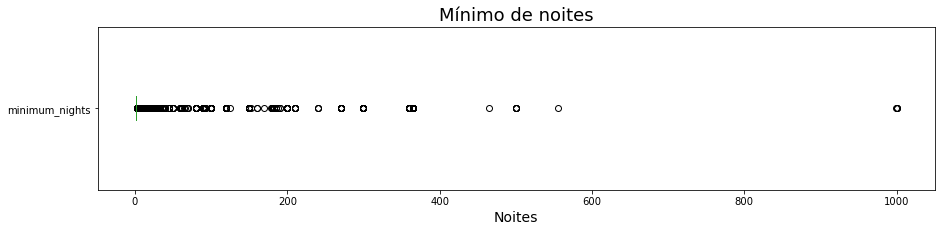

In [38]:
ax = df["minimum_nights"].plot(kind = "box", vert = False, figsize = (15,3))
ax.set_xlabel("Noites", fontsize = 14)
ax.set_title("Mínimo de noites", fontsize = 18);

Com a quantidade de outliers teremos um valor irreal para nossa pesquisa, então precisamos fazer uma tratamento adequado para nossos dados. Iremos remover outliers e por fim calcular a média para o quantidade mínima de noites.


Usaremos para fazer a limpeza dos dados um técnica que se chama Z-score. 

*  O z score nos dá uma idéia de quanto um determinado ponto está afastado da média dos dados. 

* Mede quantos desvios padrão abaixo ou acima da média populacionao ou amostral os dados estão
<center><img alt="Analisando Airbnb" width="10%" src="https://kanoki.org/images/2020/04/image-19.png"></center>

Onde:

x: observação

𝜇: média

𝜎: desvio padrão

<center><img alt="Analisando Airbnb" width="60%" src="https://i2.wp.com/www.acasinhadamatematica.pt/wp/wp-content/uploads/2011/11/500px-Standard_deviation_diagram_svg.png?w=500&ssl=1"></center>
Se analisarmos o gráfico acima estamos vendo que 99,7 % dos nossos dados estão afastados até 3 desvios padrão da média.
O que faremos aqui é transformar nos dados utilizando a formula de z para cada linha e depois todos os valores de Z que forem maior que 3 desvios ou menores que 3 desvios serão excluidos dos nossos dados. 

In [39]:
zscore = pd.DataFrame(df["minimum_nights"]) 
zscore["Zscore"] = stats.zscore(df["minimum_nights"])
df_limpo =zscore.loc[zscore["Zscore"].abs() <= 3]

In [40]:
df_limpo["minimum_nights"].mean()

5.87486254053292

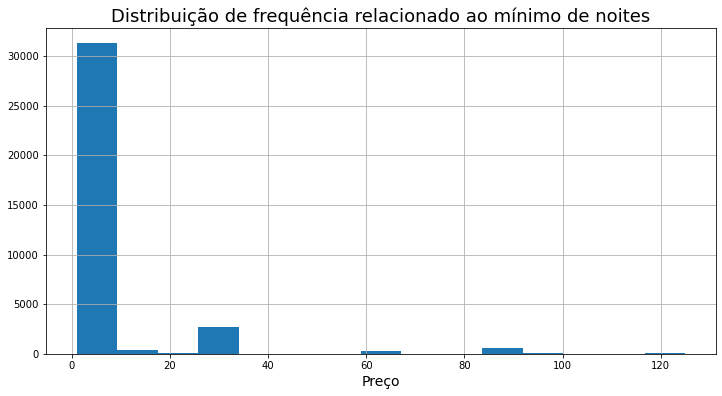

In [41]:
ax = df_limpo["minimum_nights"].hist(bins =15)
ax.set_title("Distribuição de frequência relacionado ao mínimo de noites", fontsize = 18)
ax.set_xlabel("Preço", fontsize=14)
ax.figure.set_size_inches(12, 6);


## Conclusões


A análise descritiva é fundamental possibilitando uma primeira análise em volta das variavéis, podemos ter uma noção como nossos dados estão distribuidos, como estão as medidas de tendência central. Conseguimos extrair bastante informação dos nossos dado.
Podemos perceber o quanto é importante a preparação e limpezas dos dados discrepantes do nosso conjunto de dados, possibilitando um estudo muito mais fiel.
Nesse conjunto de dados podemos perceber claramente o que a limpeza dos dados nos possibilitou uma melhor clareza. 